In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Importing files

In [0]:
pd.read_csv('a.csv')
pd.read_csv('b.txt', sep = '\t')
pd.read_table('c.txt')
pd.read_excel('c.xlsx', 'worksheet1')
pd.read_fwf()
pd.read_clipboard()

#Series

A Pandas Series is a one-dimensional array of indexed data.

In [0]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

In [0]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [0]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [0]:
data[1:3]

1    0.50
2    0.75
dtype: float64

#More

##Boolean Indexing

Boolean Indexing helps to select a subset of data based on the value of the data in the dataframe, to filter values of a column based on conditions from another set of columns.

eg, We want a list of all females who are not graduate and got a loan.

In [0]:
loan = pd.read_csv('../Data/loan_train.csv', index_col = 'Loan_ID')
loan.head()

In [0]:

loan.loc[(loan['Gender'] == 'Female') & (loan['Education'] == 'Not Graduate') & (loan['Loan_Status'] == 'Y'),
         ["Gender","Education","Loan_Status"]].head()

##Pivot Table

Pivot Table is used to create MS Excel style spreadsheet. Levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame.

In [0]:
loan = pd.read_csv('../Data/loan_train.csv', index_col = 'Loan_ID')

In [0]:
pivot = loan.pivot_table(values = ['LoanAmount'], index = ['Gender', 'Married', 'Self_Employed'], aggfunc = np.mean)
pivot

##str.split() over a column

pandas.Series.str is used to apply vectorized string functions on a pandas dataframe column. Let’s say you want to split the names in a dataframe column into first name and last name. pandas.Series.str along with split( ) can be used to perform this task.

In [0]:
df = pd.DataFrame({'name':['Elise Mccann', 'Aiden Berger', 'Elle Kelley']})
df

,name
0,Elise Mccann
1,Aiden Berger
2,Elle Kelley


In [0]:

# extract first name and last name
df['first_name'] = df['name'].str.split(' ', expand = True)[0]
df['last_name'] = df['name'].str.split(' ', expand = True)[1]

df

,name,first_name,last_name
0,Elise Mccann,Elise,Mccann
1,Aiden Berger,Aiden,Berger
2,Elle Kelley,Elle,Kelley


## Transforming data into normal/ gaussian distribution to get the optimum results.

In [0]:
#Exponential distribution
X = np.random.exponential(2, (10000,1))

#Log Normal distribution
Y = np.random.weibull(a = 2, size = (10000,1))

Text(0.5, 1.0, 'weibull distribution')

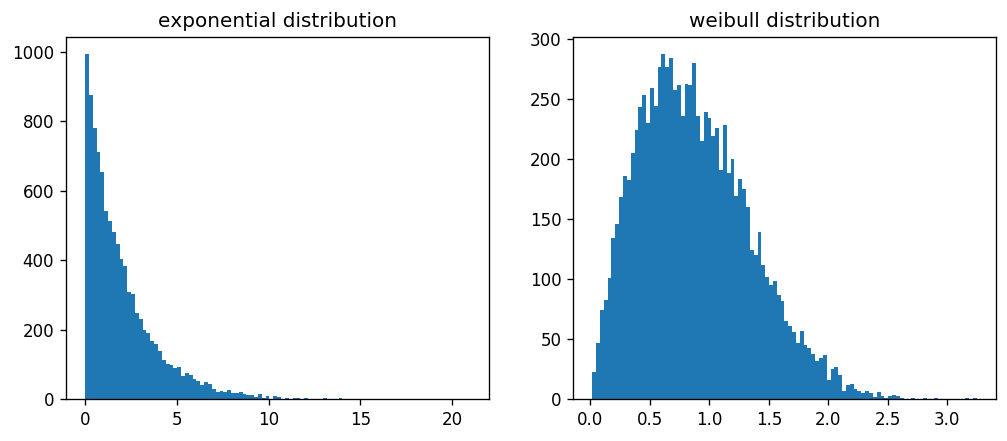

In [0]:
plt.figure(figsize = (10,4), dpi = 120)

#Plotting exponential distribution
plt.subplot(121)
plt.hist(X, bins = 100)
plt.title("exponential distribution")

#plotting weibull distribution
plt.subplot(122)
plt.hist(Y, bins = 100)
plt.title("weibull distribution")

In [0]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles = len(X), output_distribution = 'normal')

## transforming above distributions to Normal distribution ##
X = qt.fit_transform(X)
Y = qt.fit_transform(Y)
print('distributions transformed')

distributions transformed


Text(0.5, 1.0, 'transformed weibull')

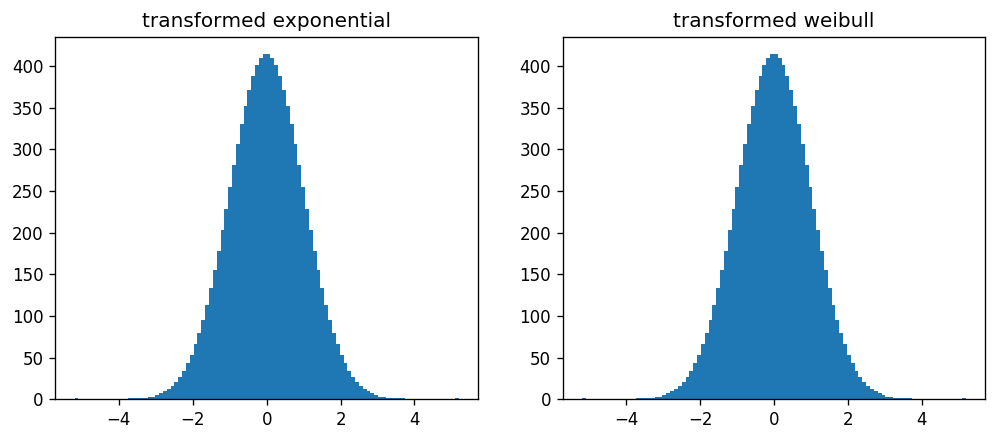

In [0]:

plt.figure(figsize = (10,4), dpi = 120)

#Plotting transformed exponential
plt.subplot(121)
plt.hist(X, bins = 100)
plt.title("transformed exponential")

#plotting transformed weibull
plt.subplot(122)
plt.hist(Y, bins = 100)
plt.title("transformed weibull")

##